In [125]:
import pandas as pd
import numpy as np
import time
import cantera as ct
print('Runnning Cantera version: ' + ct.__version__)
import matplotlib.pyplot as plt

Runnning Cantera version: 3.0.0


In [126]:
gas = ct.Solution('Jerzembeck.yaml')


In [127]:
# Define the reactor temperature and pressure
reactor_temperature = 800  # Kelvin
reactor_pressure = 101325  # Pascals
    
gas.TP = reactor_temperature, reactor_pressure
    
# Define the fuel, oxidizer and set the stoichiometry
gas.set_equivalence_ratio(phi=1.0, fuel="IXC8H18", oxidizer={"o2": 1.0, "n2": 3.76})
    
# Create a batch reactor object and add it to a reactor network
# In this example, the batch reactor will be the only reactor
# in the network
r = ct.IdealGasReactor(contents=gas, name="Batch Reactor")
reactor_network = ct.ReactorNet([r])
    
# use the above list to create a DataFrame
time_history = ct.SolutionArray(gas, extra="t")
    

    

In [128]:
def ignition_delay(states, species):
        """
        This function computes the ignition delay from the occurence of the
        peak in species' concentration.
        """
        i_ign = states(species).Y.argmax()
        return states.t[i_ign]

Computed Ignition Delay: 2.845e+00 seconds. Took 1.80s to compute


Text(0, 0.5, 'Heat Release Rate')

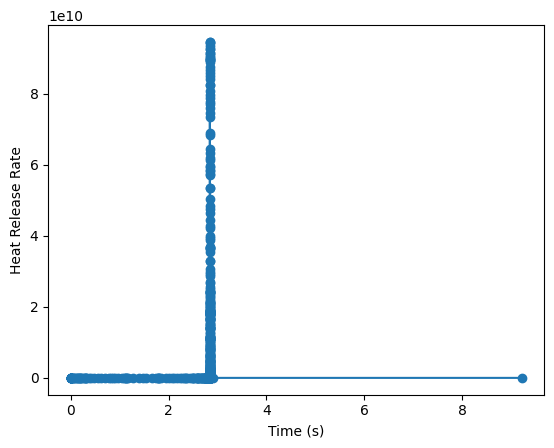

In [129]:
reference_species = "oh"
    
# Tic
t0 = time.time()
    
# This is a starting estimate. If you do not get an ignition within this time, increase it
estimated_ignition_delay_time = 20
t = 0
counter = 1
while t < estimated_ignition_delay_time :
    t = reactor_network.step()
    if not counter % 10:
            # We will save only every 10th value. Otherwise, this takes too long
            # Note that the species concentrations are mass fractions
        time_history.append(r.thermo.state, t=t)
    counter += 1
# We will use the 'oh' species to compute the ignition delay
tau = ignition_delay(time_history, reference_species)
    
# Toc
t1 = time.time()
    
print(f"Computed Ignition Delay: {tau:.3e} seconds. Took {t1-t0:3.2f}s to compute")
    
# If you want to save all the data - molefractions, temperature, pressure, etc
    # >>>>>>>>>>>>>>>>>>>>>>>>uncomment the next line
    
plt.figure()
plt.plot(time_history.t, time_history.heat_release_rate, "-o")

plt.xlabel("Time (s)")
plt.ylabel("Heat Release Rate")
#plt.xlim([0,0.1])

In [130]:

#print(time_history.heat_release_rate)

In [131]:
#def IndelandTemp(Fuel='',phi = 1.0):
gas = ct.Solution("Jerzembeck.yaml")
    #fuel_Species = Fuel 
reactor_temperature = 800  
reactor_pressure = 101325  
gas.TP = reactor_temperature, reactor_pressure
gas.set_equivalence_ratio(phi=1.0, fuel= "CH4", oxidizer={"O2": 1, "N2": 3.76})
r = ct.IdealGasReactor(contents=gas, name="Batch Reactor")
reactor_network = ct.ReactorNet([r])
time_history_1 = ct.SolutionArray(gas, extra="t")
r = ct.IdealGasReactor(contents=gas, name="Batch Reactor")
reactor_network = ct.ReactorNet([r])
time_history_1 = ct.SolutionArray(gas, extra="t")
#print(time_history.t)
#time_history.to_csv("time_history_TEST.csv")

In [132]:
def ignition_delay(states, species):
    """
    This function computes the ignition delay from the occurence of the
    peak in species' concentration.
    """
    i_ign = states(species).Y.argmax()
    return states.t[i_ign]


Computed Ignition Delay: 1.432e+02 seconds. Took 1.75s to compute


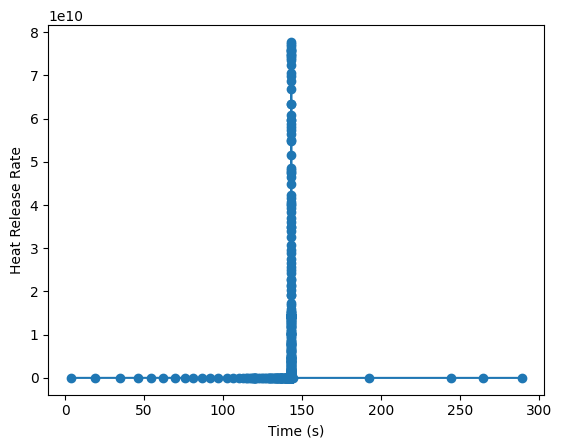

In [133]:
reference_species_1 = "oh"
#
# time_history = []

# Tic
t0 = time.time()

# This is a starting estimate. If you do not get an ignition within this time, increase it
estimated_ignition_delay_time_1 = 300
t = 0

counter = 1

while t < estimated_ignition_delay_time_1 :
    t = reactor_network.step()
    if not counter % 10:
        # We will save only every 10th value. Otherwise, this takes too long
        # Note that the species concentrations are mass fractions
        time_history_1.append(r.thermo.state, t=t)
    counter += 1 

# We will use the 'oh' species to compute the ignition delay
tau_1 = ignition_delay(time_history_1, reference_species_1)

# Toc
t1 = time.time()
#print(time_history.t)
print(f"Computed Ignition Delay: {tau_1:.3e} seconds. Took {t1-t0:3.2f}s to compute")
#print(time_history.T)
plt.plot(time_history_1.t, time_history_1.heat_release_rate, "-o")
plt.xlabel("Time (s)")
plt.ylabel("Heat Release Rate")
plt.show()

#fuels = ['CH4']
#for fuel in fuels :
    #IndelandTemp(fuel,1.0)
    #break

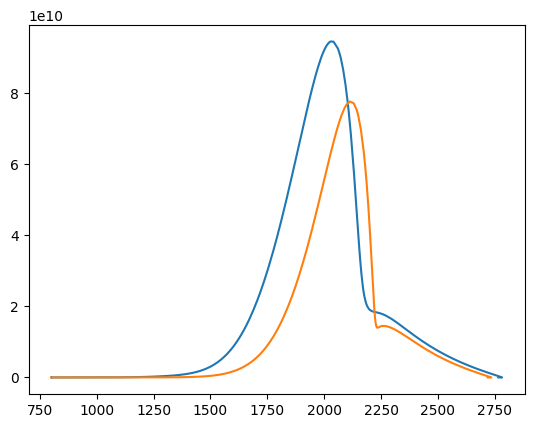

In [134]:
plt.plot(time_history.T,time_history.heat_release_rate)
plt.plot(time_history_1.T,time_history_1.heat_release_rate)
plt.show()